# Multi-Mode Interferometer 50/50 Powersplitter

MMIs are widely used in photonic integrated circuits (PICs) to split or combine optical signals in a compact and fabrication-friendly way. They rely on **self-imaging** phenomena within a multimode waveguide section, enabling robust and broadband power splitting without the need for precise tapering or tight tolerances.

We build a basic 1×2 MMI splitter layout consisting of:

* A single input waveguide,
* A multimode interference region, and
* Two output waveguides symmetrically offset from the center.

The geometry is constructed using `beamz`'s parametric design primitives and visualized in 3D. This structure will then be used in a full FDTD simulation to study field propagation and quantify power splitting efficiency.

_Download this notebook and follow along if you want to recreate or modify this nanophotonic device for your own purposes!_

___

First, let's import `beamz`and `numpy`:

In [20]:
from beamz import *
import numpy as np

We then quickly define all the relevant parameters of our design and simulation, the domain size, the parameters for the MMI structure, material permittivities, and the optimal Yee cell grid sizes and time step width:

In [ ]:
# Parameters
X, Y, Z = 20*µm, 10*µm, 5*µm # domain size
WG_W = 0.565*µm # width of the waveguide
H = 3.5*µm # height of the MMI
W = 9*µm # length of the MMI (in propagation direction)
OFFSET = 1.05*µm # offset of the output waveguides from center of the MMI
WL = 1.55*µm # wavelength
TIME = 40*WL/LIGHT_SPEED # total simulation duration
N_CORE, N_CLAD = 2.04, 1.444 # Si3N4, SiO2
DX, DT = calc_optimal_fdtd_params(WL, max(N_CORE, N_CLAD), dims=3, safety_factor=0.40) 

Creating the design is a simple as adding a bunch of rectangles, where every added rectangle structure overwrites the material values of the area it overlaps with its own properties. You should be able to see an interactive 3D visualization of the MMI you can rotate, zoom in, and so on:

● Created design with size: 2.00e-05 x 1.00e-05 x 5.00e-06 m

● Unified 4 polygons with permittivity=4.1616 (simplified to 16 vertices)

● Polygon unification complete: 4 structures merged into 3 unified shapes, 0 isolated rings preserved

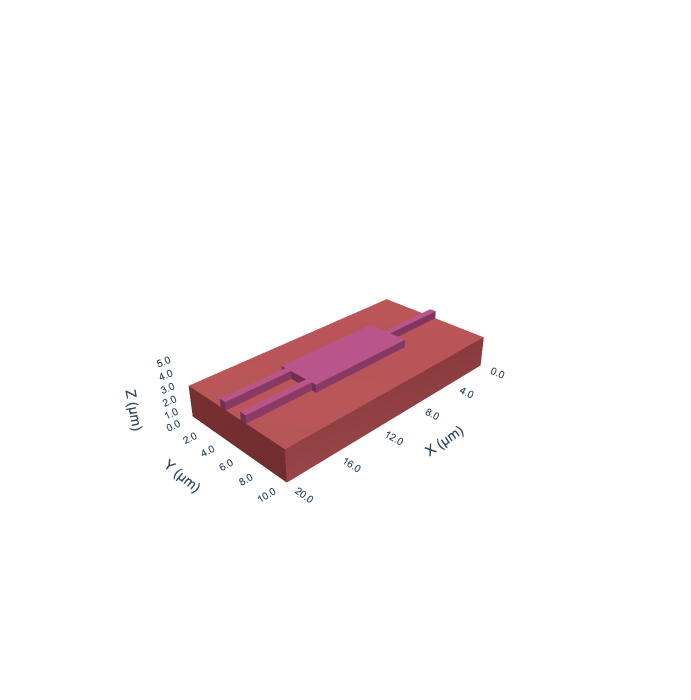

In [24]:
# Design the MMI with input and output waveguides
design = Design(width=X, height=Y, depth=Z, material=Material(permittivity=1.0, permeability=1.0, conductivity=0.0), pml_size=WL)
design += Rectangle(position=(0, 0, 0), width=X, height=Y, depth=Z/2, material=Material(N_CLAD**2))
design += Rectangle(position=(0, Y/2-WG_W/2, Z/2), width=X/2, height=WG_W, depth=Z/8, material=Material(N_CORE**2))
design += Rectangle(position=(X/2, Y/2 + OFFSET - WG_W/2, Z/2), width=X/2, height=WG_W, depth=Z/8, material=Material(N_CORE**2))
design += Rectangle(position=(X/2, Y/2 - OFFSET - WG_W/2, Z/2), width=X/2, height=WG_W, depth=Z/8, material=Material(N_CORE**2))
design += Rectangle(position=(X/2-W/2, Y/2-H/2, Z/2), width=W, height=H, depth=Z/8, material=Material(N_CORE**2))
design.show()

Let's add our Monitors and Sources!